In [188]:
import xarray as xr
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from copy import deepcopy

In [189]:
zarr_array = xr.open_zarr('SW_06_SWP_01_2025-06-13.zarr')

depth_data = zarr_array['depth'][::7].values
date_data = zarr_array['time'][::7].values
zarr_array.close()
template_map = np.array([len(depth[~np.isnan(depth)]) for depth in depth_data]).argmax()
original_shape = depth_data[template_map].shape


mask = np.isnan(depth_data[template_map])
mask
averaged_depth = np.nanmean(depth_data, axis=(0))


C:\Users\jbroders\AppData\Local\Temp\ipykernel_17632\1318822589.py:12: RuntimeWarning: Mean of empty slice
  averaged_depth = np.nanmean(depth_data, axis=(0))


In [190]:

depth_data_post = depth_data[date_data > np.datetime64('2021-01-01')]
date_data_post = date_data[date_data > np.datetime64('2021-01-01')]


In [191]:
def random_masking(depths,mask,scale=1):
    random_mask = deepcopy(depths)
    for array in depths:
        array[mask] = np.random.random(size=np.sum(mask))*scale
        array[array==None] = 0
        array[array==np.nan] = 0
    return random_mask      
        
        

In [192]:

#def replace_non_common_nans(mask:np.ndarray,array:np.ndarray):
 #       nan_mask = np.isnan(array)
  #      array[~mask & nan_mask] = 0
   #     return array

#def test_nans(test:np.ndarray,control:np.ndarray):
 #       if len(test[~np.isnan(test)]) != len(control[~np.isnan(control)]):
  #              print("Dimensions wrong")


In [193]:
weeks_in=8
weeks_out=4

In [194]:
1393/632

2.204113924050633

In [195]:
1393/2

696.5

In [196]:
def downscale_array_avg(array, factor):
    reshaped_array = array.reshape((array.shape[0] // factor, factor, array.shape[1] // factor, factor))
    downscaled_array = reshaped_array.mean(axis=(1, 3))
    return downscaled_array

In [197]:
output_shape = (697, 326)

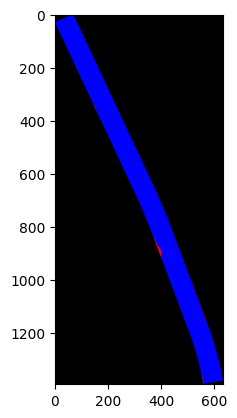

In [198]:
# Define the depth array
depth_array = depth_data_post[10]
normalized_depths = depth_array / np.max(depth_array)
# Create an RGB image where depths < 48 appear as red
colored_depths = np.zeros((*depth_array.shape, 3))  # Create an RGB image
colored_depths[..., 0] = np.where(depth_array < 50, 1, 0)  # Red channel
colored_depths[..., 1] = 0  # Green channel
colored_depths[..., 2] = np.where(depth_array > 50, 1, 0)  # Blue channel

plt.imshow(colored_depths)
plt.show()

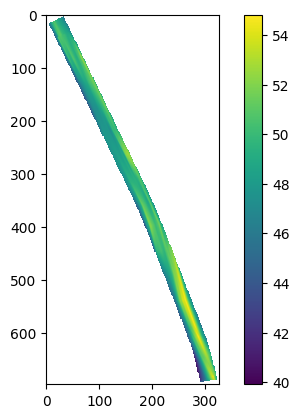

In [199]:
from skimage.transform import resize
reduced_depths = [depth for depth in depth_data if len(depth_data[template_map][~np.isnan(depth_data[template_map])]) == len(depth[~np.isnan(depth)])]
reduced_depths = [resize(depth, output_shape, anti_aliasing=True) for depth in reduced_depths]
plt.imshow(reduced_depths[10])
plt.colorbar()
plt.show()

In [200]:
min([np.nanmin(depth) for depth in depth_data])

26.67938777378627

In [201]:
def dredge_percent_collection(depth,date):
    dredge_percent=[]
    threshold_deepening = 50
    threshold_pre_deepening = 45
    combined= [(pos, time) for pos, time in zip(depth, date)]
    for item in combined:
        if item[1]< np.datetime64('2020-01-01'):
            dredge = (item[0]< threshold_pre_deepening).sum()/(~np.isnan(item[0])).sum()
            dredge_percent.append([dredge,item[1]])
        else:
            dredge = (item[0]< threshold_deepening).sum()/(~np.isnan(item[0])).sum()
            dredge_percent.append([dredge,item[1]])
    return dredge_percent

In [202]:
dredge_percent = dredge_percent_collection(depth_data,date_data)

In [203]:
dredge_percent = np.array(dredge_percent,dtype='object')

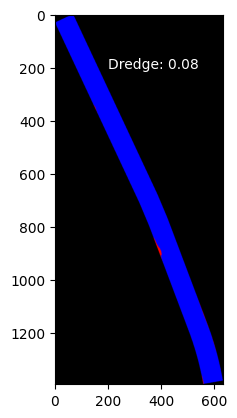

In [204]:
# Define the depth array
depth_array = depth_data_post[10]
normalized_depths = depth_array / np.max(depth_array)
# Create an RGB image where depths < 48 appear as red
colored_depths = np.zeros((*depth_array.shape, 3))  # Create an RGB image
colored_depths[..., 0] = np.where(depth_array < 50, 1, 0)  # Red channel
colored_depths[..., 1] = 0  # Green channel
colored_depths[..., 2] = np.where(depth_array > 50, 1, 0)  # Blue channel

plt.imshow(colored_depths)
plt.text(200, 200, f"Dredge: {dredge_percent[10][0]:.2f}", color='white')
plt.show()

In [205]:
dredge_percent[0][:]

array([0.060103459116501064,
       numpy.datetime64('2012-01-03T00:00:00.000000000')], dtype=object)

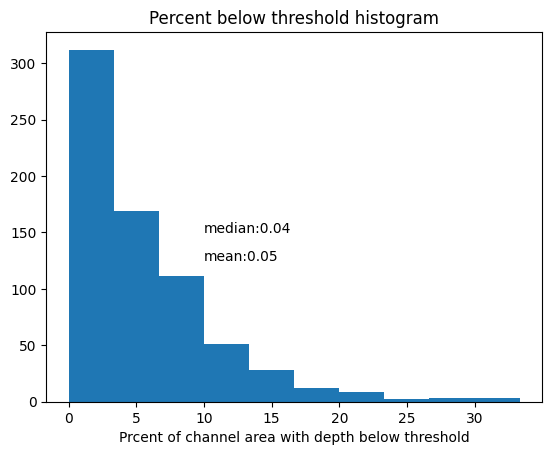

In [206]:
plt.hist(dredge_percent[:,0]*100,bins=10)
plt.xlabel('Prcent of channel area with depth below threshold')
plt.title('Percent below threshold histogram')
plt.text(10,125,f"mean:{np.mean(dredge_percent[:,0]):.2f}")
plt.text(10,150,f"median:{np.median(dredge_percent[:,0]):.2f}")
plt.show()

In [207]:
max_depth =80
min_depth = 20
percent_below = dredge_percent[:,0]
scaled_depths = [(arr - min_depth) / (max_depth - min_depth) for arr in reduced_depths]

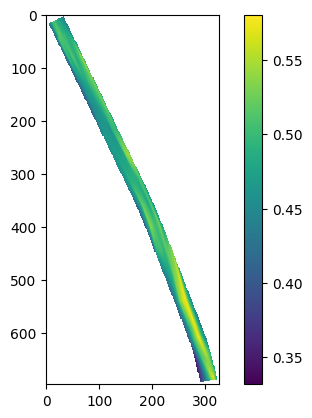

In [208]:
plt.imshow(scaled_depths[10])
plt.colorbar()
plt.show()

In [209]:

reduced_mask = np.isnan(reduced_depths[0])

In [210]:
masked_depths = random_masking(scaled_depths,reduced_mask,0)
masked_depths = random_masking(scaled_depths,reduced_mask,0)

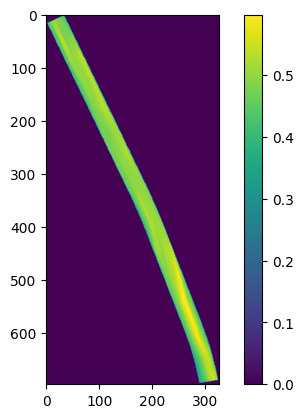

In [211]:
plt.imshow(masked_depths[1])
plt.colorbar()
plt.show()

In [212]:
percent_below

array([0.060103459116501064, 0.06851546647105336, 0.05498766302432147,
       0.07952824167135059, 0.06744848479074775, 0.07237663889862418,
       0.06590641540632104, 0.08601802676156328, 0.07748991274184706,
       0.08013192066787085, 0.07665417554075792, 0.11098230573603285,
       0.09851813909183224, 0.09956056398781442, 0.09814969580963165,
       0.09043035972645333, 0.10734280502161235, 0.10222953117838945,
       0.11280654930400165, 0.12354532301692144, 0.11933069132540731,
       0.14622705092605073, 0.07212501909614573, 0.07355386011736266,
       0.09568741631394963, 0.10276871646941471, 0.052615497982548366,
       0.04088821790274895, 0.06341717664608776, 0.054700347774512714,
       0.04864349967199561, 0.06199732204638791, 0.04243388240368803,
       0.05489804904788864, 0.046351962185138255, 0.038147359340037205,
       0.03327671887777568, 0.023104089720432427, 0.0353076501406375,
       0.017676291124111468, 0.019707222386973283, 0.02247504021423629,
       0.0386

In [213]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
percent_below_scaler = scaler.fit(percent_below.reshape(-1,1))

In [214]:
percent_below_scaled = percent_below_scaler.transform(percent_below.reshape(-1,1))

In [215]:
def create_sequences(data, input_length, output_length,y_predefined= None,date=None):
    X, y = [], []
    for i in range(len(data) - input_length - output_length + 1):
        X.append(data[i:i + input_length:7])
        if y_predefined.any()== None:
            y.append(np.nanmin(data[i + input_length + output_length-1]))
        else:
            y.append(y_predefined[i+input_length+output_length-1])

    return np.array(X), np.array(y)


sequence_depths_X,sequence_depths_y = create_sequences(masked_depths, weeks_in*7, weeks_out*7,percent_below_scaled)

In [216]:
percent_below

array([0.060103459116501064, 0.06851546647105336, 0.05498766302432147,
       0.07952824167135059, 0.06744848479074775, 0.07237663889862418,
       0.06590641540632104, 0.08601802676156328, 0.07748991274184706,
       0.08013192066787085, 0.07665417554075792, 0.11098230573603285,
       0.09851813909183224, 0.09956056398781442, 0.09814969580963165,
       0.09043035972645333, 0.10734280502161235, 0.10222953117838945,
       0.11280654930400165, 0.12354532301692144, 0.11933069132540731,
       0.14622705092605073, 0.07212501909614573, 0.07355386011736266,
       0.09568741631394963, 0.10276871646941471, 0.052615497982548366,
       0.04088821790274895, 0.06341717664608776, 0.054700347774512714,
       0.04864349967199561, 0.06199732204638791, 0.04243388240368803,
       0.05489804904788864, 0.046351962185138255, 0.038147359340037205,
       0.03327671887777568, 0.023104089720432427, 0.0353076501406375,
       0.017676291124111468, 0.019707222386973283, 0.02247504021423629,
       0.0386

In [217]:
#train_X = np.moveaxis(train_X, 1, -1)
#test_X = np.moveaxis(test_X, 1, -1)
num_samples = len(sequence_depths_X)
indices = np.arange(num_samples)

train_X, test_X, train_y, test_y,  train_idx, test_idx = train_test_split(sequence_depths_X, sequence_depths_y, indices, test_size=0.2, random_state=42)
print(train_X.shape)

# Print shapes to verify

train_X = np.transpose(train_X,(0,2,3,1))
print(train_X.shape)
test_X = np.transpose(test_X,(0,2,3,1))

train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y[:,0].tolist()))
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_y[:,0].tolist()))

train_dataset = train_dataset.batch(64)
test_dataset = test_dataset.batch(64)


(479, 8, 697, 326)
(479, 697, 326, 8)


In [218]:
# Calculate the number of samples corresponding to the final 6 weeks

validation_start_index =  -6

# Create validation dataset (only input data)
validation_X = sequence_depths_X[validation_start_index:-5]

# Print shape to verify
validation_X = np.transpose(validation_X,(0,2,3,1))
print("Validation X shape:", validation_X.shape)

Validation X shape: (1, 697, 326, 8)


In [219]:
train_dates = date_data[train_idx]
test_dates = date_data[test_idx]

In [220]:
print(test_X.shape)

(120, 697, 326, 8)


In [221]:

import visualkeras

c:\Users\jbroders\AppData\Local\anaconda3\envs\tf_test\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\jbroders\AppData\Local\anaconda3\envs\tf_test\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


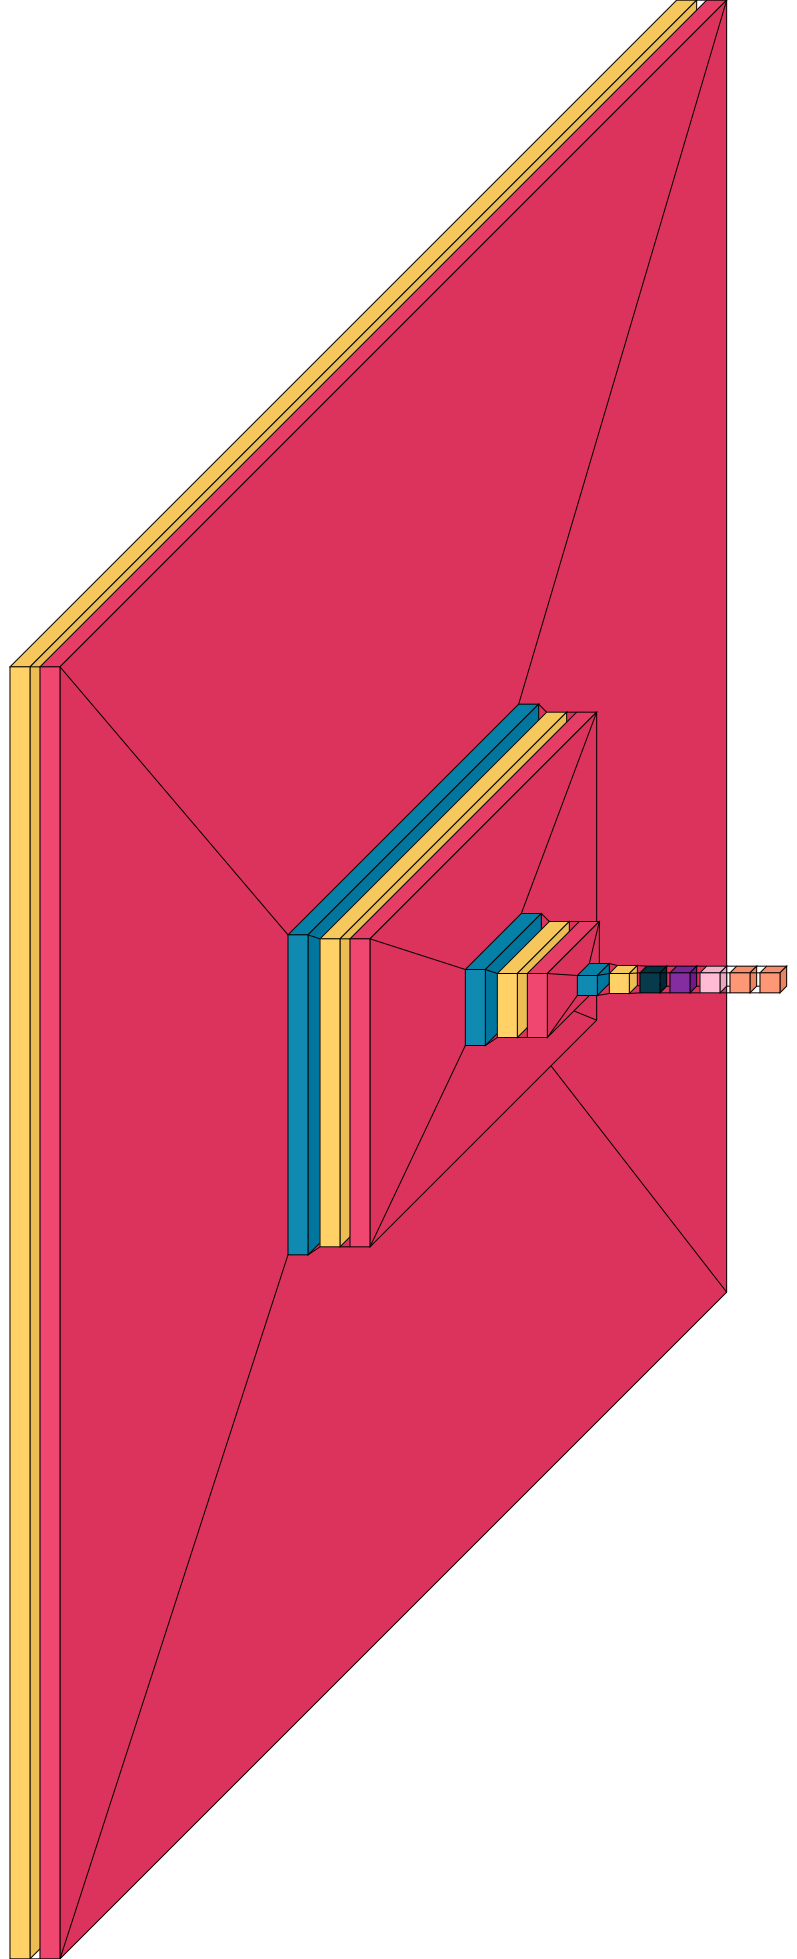

In [223]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense, MaxPool3D, Flatten, Input,Dropout,Conv2D,Conv3D, MaxPool2D,GlobalAveragePooling2D,BatchNormalization

# Define your model
model = Sequential()
optimizer= tf.keras.optimizers.Adam(learning_rate=0.00005)

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(4, 4), activation='relu', input_shape=( 697, 326,weeks_in)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(4, 4)))

model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(4, 4)))

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(4, 4)))


model.add(Conv2D(filters=16, kernel_size=(4, 4), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dropout(.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))

# Compile your model
model.compile(optimizer=optimizer, loss='mse',metrics = ['mae'])


visualkeras.layered_view(model).show() # display using your system viewer

visualkeras.layered_view(model)

In [224]:
history = model.fit(train_dataset,epochs=300, validation_data=(test_dataset),callbacks=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",patience=15, start_from_epoch=0,restore_best_weights=True))

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.3548 - mae: 0.5646 - val_loss: 0.1337 - val_mae: 0.3407
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.1146 - mae: 0.3051 - val_loss: 0.1225 - val_mae: 0.3255
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 0.0395 - mae: 0.1603 - val_loss: 0.1144 - val_mae: 0.3137
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 0.0312 - mae: 0.1308 - val_loss: 0.1094 - val_mae: 0.3064
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 0.0310 - mae: 0.1236 - val_loss: 0.1065 - val_mae: 0.3020
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.0288 - mae: 0.1260 - val_loss: 0.1043 - val_mae: 0.2986
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 0.0272 - mae: 0.1246 - val_loss: 0.1021 - val_mae: 0.2954
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 0.0253 - mae: 0.1215 - val_loss: 0.1000 - val_mae: 0.2920
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 0.0265 - mae: 0.1279 - val_loss

In [225]:
pred_y = model.predict(test_X,verbose=True)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


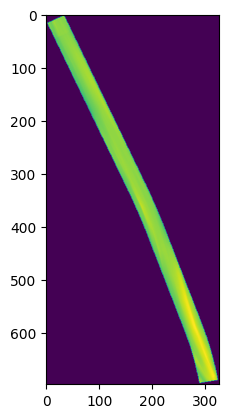

In [226]:
plt.imshow(test_X[0,:,:,0])

In [227]:
import tensorflow as tf
import numpy as np

# Define the Monte Carlo Dropout function to run stochastic forward passes
def monte_carlo_dropout(model, input_data, num_samples=100):
    """
    Run multiple stochastic forward passes with dropout on during inference.
    Args:
    - model: Trained model.
    - input_data: Input data for the model (e.g., a batch of samples).
    - num_samples: Number of forward passes to make for uncertainty estimation.
    
    Returns:
    - mean_pred: Mean prediction from multiple passes.
    - uncertainty: Standard deviation (uncertainty) from the predictions.
    """
    
    # Use tf.function for speed-up (graph execution)
    @tf.function
    def predict_with_dropout(inputs):
        # 1 indicates training mode, which means dropout will be active during inference
        return model(inputs, training=True)

    # Perform multiple stochastic forward passes
    predictions = []
    for _ in range(num_samples):
        pred = predict_with_dropout(input_data)
        predictions.append(pred.numpy())  # Convert tensor to numpy array
    
    predictions = np.array(predictions)
    
    # Calculate the mean and standard deviation (uncertainty) from the predictions
    mean_pred = predictions.mean(axis=0)
    uncertainty = predictions.std(axis=0)
    
    return mean_pred, uncertainty

In [295]:
model.save('reach_6_CNN.keras')

In [271]:
# Perform Monte Carlo Dropout and get both predictions and uncertainty
mean_pred, uncertainty = monte_carlo_dropout(model, test_X, num_samples=25)

In [272]:
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

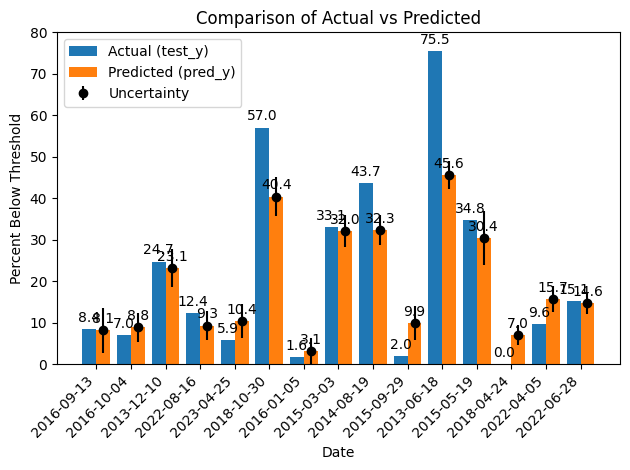

In [280]:
x = np.arange(len(pred_y[50:65]))  # Create an array of indices for the bars

dates_np = date_data[test_idx][50:65]
dates = [pd.Timestamp(d).to_pydatetime() for d in dates_np]

# Convert datetime objects to string in desired format
dates_str = [d.strftime('%Y-%m-%d') for d in dates]

width = 0.4  # Width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, test_y[50:65,0]*100
                ,width, label='Actual (test_y)')
rects2 = ax.bar(x + width/2, pred_y[50:65].flatten()
                *100
                ,width, label='Predicted (pred_y)')

errorbar= ax.errorbar(x + width/2, pred_y[50:65].flatten()*100, yerr=uncertainty[50:65].flatten()*100, fmt='o', color='black', label='Uncertainty')

# Add labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Percent Below Threshold')
ax.set_title('Comparison of Actual vs Predicted')
ax.set_xticks(x)
ax.set_xticklabels(dates_str, rotation=45, ha='right')
ax.legend()

# Optionally, add value labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',  # Format to 2 decimal places
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.ylim(0,80)
fig.tight_layout()



plt.show()


In [258]:
rmse = np.sqrt(np.mean((pred_y[:,0] - test_y.flatten()) ** 2))
mae = np.mean(np.abs((pred_y[:,0] - test_y.flatten())))
print(f"RMSE:{rmse.round(3)}")
print(f"Mae:{mae.round(3)}")

RMSE:0.116
Mae:0.077


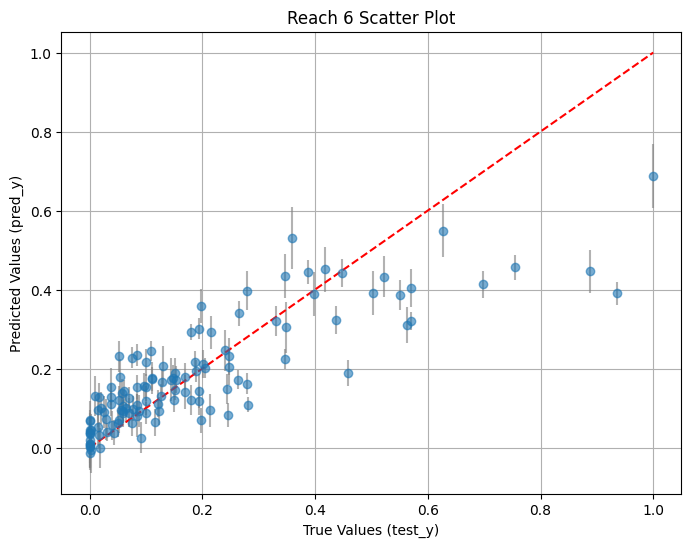

In [293]:
import matplotlib.pyplot as plt
import numpy as np

# Example: replace these with your actual data
# pred_y = np.array([...])
# test_y = np.array([...])
# uncertainty = np.array([...])  # same shape as test_y

plt.figure(figsize=(8, 6))

# Scatter plot with error bars
plt.errorbar(test_y, pred_y.flatten(), yerr=uncertainty.flatten(), fmt='o', ecolor='gray', alpha=0.6)

# Reference line: perfect predictions
plt.plot([0, 1], [0, 1], 'r--')

# Labels and title
plt.xlabel("True Values (test_y)")
plt.ylabel("Predicted Values (pred_y)")
plt.title("Reach 6 Scatter Plot")
plt.grid(True)
plt.show()

In [241]:
test_y[60:70,0]

array([7.55334358e-01, 3.48223679e-01, 0.00000000e+00, 9.57082355e-02,
       1.51358205e-01, 4.18440290e-01, 3.90332065e-02, 6.41202018e-02,
       5.51023711e-01, 5.12530010e-04])

In [257]:
rmse = np.sqrt(np.mean((test_y[:,0] - pred_y.flatten()) ** 2))
mae = np.mean(np.abs((test_y[:,0] - pred_y.flatten())))

In [243]:
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [247]:
years = pd.to_datetime(pd.Series(date_data[test_idx])).dt.year

# Normalize years for colormap
norm = mcolors.Normalize(vmin=years.min(), vmax=years.max())
colormap = cm.viridis  # Choose a colormap
colors = colormap(norm(years))


In [251]:
last_30_X, last_30_y = create_sequences(masked_depths[-(weeks_in*7 + weeks_out*7 + 30):], weeks_in*7, weeks_out*7, dredge_percent[-(weeks_in*7 + weeks_out*7 + 30):])
last_30_X= np.transpose(last_30_X,(0,2,3,1))
pred_last_30_y =model.predict((last_30_X))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [252]:
_, uncertainty = monte_carlo_dropout(model, last_30_X, num_samples=100)

In [ ]:
rmse = np.sqrt(np.mean((last_30_y[:,0]*100 - pred_last_30_y.flatten()*100) ** 2))
mae = np.mean(np.abs((last_30_y[:,0]*100 - pred_last_30_y.flatten()*100)))
print(f"RMSE:{rmse.round(3)}")
print(f"Mae:{mae.round(3)}")

RMSE:0.925
Mae:0.792


In [260]:
top = (pred_last_30_y.flatten()+uncertainty.flatten())*100
bottom = (pred_last_30_y.flatten()-uncertainty.flatten())*100

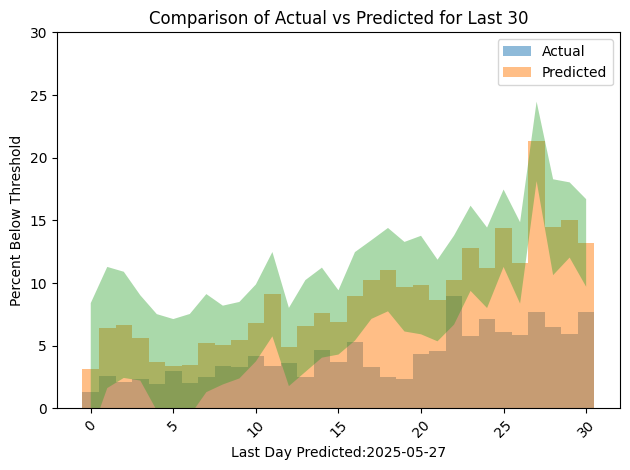

In [265]:
x = np.arange(len(pred_last_30_y))  # Create an array of indices for the bars

width = 1  # Width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x, last_30_y[:,0]*100, width, label='Actual', alpha=0.5)
rects2 = ax.bar(x, pred_last_30_y.flatten()*100, width, label='Predicted', alpha=0.5)
last_day= pd.Timestamp(date_data[-1]).to_pydatetime().strftime('%Y-%m-%d')
errorbar= ax.fill_between(x, bottom,top,alpha=.4)
# Add labels, title, and legend
ax.set_xlabel(f'Last Day Predicted:{last_day}')
ax.set_ylabel('Percent Below Threshold')
ax.set_title('Comparison of Actual vs Predicted for Last 30')
ax.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.ylim(0, 30)
fig.tight_layout()

plt.show()